# [CSI-30] Atividade 4  - Predictive analytics

##### Importação de Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pymssql
import csv
import time
import math
import warnings

from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta

In [2]:
warnings.filterwarnings('ignore')

In [3]:
# pd.set_option('display.max_rows', None)

## Conexão com o MSSQL Server 2017

In [5]:
conn = pymssql.connect(host='localhost', user='sa', password='Pent@gon1979', database='master')

In [6]:
conn.autocommit(True)

In [7]:
cursor = conn.cursor()

### Modelo Dimensional

![Diagrama](../images/schema_dim.png)

##### Informações Diárias

In [8]:
path_files_date = [
                                                                                    202111, 202112,
    202201, 202202, 202203, 202204, 202205, 202206, 202207, 202208, 202209, 202210, 202211, 202212,
    202301, 202302, 202303, 202304, 202305, 202306, 202307, 202308, 202309, 202310  
]

In [9]:
inf_diario = pd.DataFrame()

In [10]:
for date in path_files_date:
    new_df = f"../data/inf_diario/inf_diario_fi_{date}.csv"
    inf_diario = pd.concat([inf_diario, pd.read_csv(new_df, sep=';')], axis=0)

##### Informações cadastrais

In [11]:
cad = pd.read_csv('../data/cad/cad_fi.csv', sep=';', encoding='iso-8859-1', low_memory=False)

## Data analytics

In [12]:
cursor.execute('USE [FI_DW]')

In [31]:
query1 = '''
    SELECT
        t.datetime AS DT_COMPTC,
        i.DenomSocial AS DENOM_SOCIAL, 
        v.NetWorth AS 'VL_PATRIM_LIQ'
    FROM 
        fact_Value v
    JOIN 
        dim_Investment_Fund i ON v.id_dim_investment_fund = i.id_dim_investment_fund  
    JOIN 
        dim_Time t ON v.id_dim_time = t.id_dim_time
    WHERE
        i.TypeFund = 'FI' AND
        i.Situation = 'EM FUNCIONAMENTO NORMAL'
'''


data = pd.read_sql(query1, conn)

In [32]:
data.sample(3)

,DT_COMPTC,DENOM_SOCIAL,VL_PATRIM_LIQ
23293,2021-11-24,SANTANDER ETHICAL AÇÕES SUSTENTABILIDADE IS FU...,1.122859e+08
33949,2021-11-18,SANTANDER PB JANAUACÁ MULT FIC FI,4.073134e+07
79219,2021-11-29,BRADESCO FUNDO DE INVESTIMENTO EM COTAS DE FUN...,1.214787e+07


In [33]:
data = data.pivot_table(values='VL_PATRIM_LIQ', index='DT_COMPTC', columns='DENOM_SOCIAL')

In [35]:
data.head(3)

DENOM_SOCIAL,051 BLUE MARLIN FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO- CRED PRIV IE,051 SERRAMBI FUNDO DE INVESTIMENTO EM AÇÕES,1818 FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO DE AÇÕES,3 FS FUNDO DE INVESTIMENTO EM ACOES - INVESTIMENTO NO EXTERIOR,392 FUNDO DE INVESTIMENTO MULTIMERCADO - CRÉDITO PRIVADO INVESTIMENTO NO EXTERIOR,3RH MULTIMERCADO FUNDO DE INVEST EM COTAS DE FDOS DE INVEST INVESTIMENTO NO EXTERIOR CREDITO PRIVAD,4LIFE PREVIDÊNCIA FUNDO DE INVESTIMENTO RENDA FIXA,4UM MARLIM DIVIDENDOS FUNDO DE INVESTIMENTO EM AÇÕES,4UM SMALL CAPS FUNDO DE INVESTIMENTO EM AÇÕES,5P3G FUNDO DE INVESTIMENTO MULTIMERCADO CRÉDITO PRIVADO INVESTIMENTO NO EXTERIOR,...,ZURICH BNPP MASTER RENDA FIXA FUNDO DE INVESTIMENTO - PREVIDENCIARIO,ÁGORA BOLSA FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO EM AÇÕES,ÁQUILA 1 FUNDO DE INVESTIMENTO MULTIMERCADO,ÁQUILA 2 FUNDO DE INVESTIMENTO MULTIMERCADO,ÁQUILA FUNDO DE INVESTIMENTO MULTIMERCADO,ÁRIES FUNDO DE INVESTIMENTO MULTIMERCADO CRÉDITO PRIVADO,ÁRTICO FUNDO DE INVESTIMENTO MULTIMERCADO CRÉDITO PRIVADO,ÊXITO - FUNDO DE INVESTIMENTO RENDA FIXA,ÓRAMA OURO FUNDO DE INVESTIMENTO MULTIMERCADO,ÔMEGA MULTIMERCADO CRÉDITO PRIVADO - FUNDO DE INVESTIMENTO
DT_COMPTC,,,,,,,,,,,,,,,,,,,,,
2021-11-01,14442453.52,7119297.74,18387196.92,52444213.74,1.257507e+09,40136310.86,45531035.26,2.329929e+08,3.661384e+08,20869047.18,...,133555038.1,2366006.04,1.439373e+08,4.022644e+08,1.995503e+08,36439941.64,1292618.20,2.233090e+09,2.067466e+08,32399046.40
2021-11-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-03,14576554.57,6975656.97,18639034.87,52626889.67,1.268389e+09,40382270.18,45523568.17,2.362238e+08,3.720547e+08,21037705.33,...,133840745.3,2379310.37,1.439954e+08,4.025247e+08,1.999064e+08,37018189.29,1292726.15,2.277447e+09,2.025041e+08,32550876.96


In [39]:
# data.index = pd.to_datetime(data.index)

In [40]:
data = data.loc[:, ~data.iloc[0, :].isnull()]

In [41]:
data = data.loc[:, ~data.iloc[-1, :].isnull()]

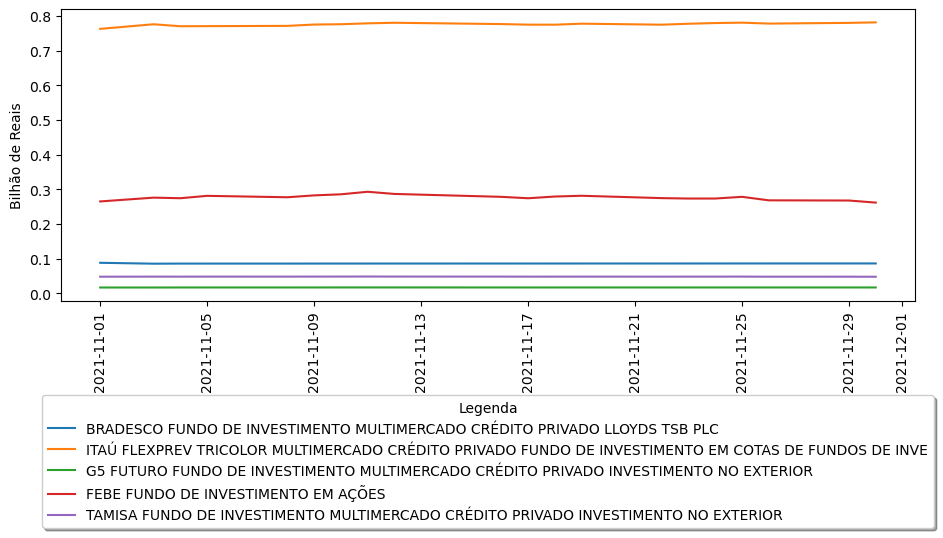

In [44]:
plt.figure(figsize=(10, 6))

for column in np.random.choice(data.columns, size=5, replace=False):
    sns.lineplot(data=data, x=data.index, y=data[column]/1000000000, label = column)

plt.xlabel('Data')
plt.ylabel('Bilhão de Reais')
plt.xticks(rotation=90)

plt.legend(title='Legenda', loc='upper center', bbox_to_anchor=(0.5, -0.3), fancybox=True, shadow=True, ncol=1)

# Ajustando o layout para evitar sobreposições
plt.tight_layout()


# plt.legend()
plt.show()

In [45]:
CoefficientOfVariation = pd.DataFrame(columns=['beta_mean', 'beta_std', 'Coefficient_of_variation'])

In [46]:
predictions = dict()
coef = dict()
indexes = dict()

In [47]:
for column, serie in data.items():
    beta = serie / serie.shift(1) - 1    
    new_data = pd.DataFrame({'beta_mean': [beta.mean()], 'beta_std': [beta.std()], 'Coefficient_of_variation': [beta.mean() / beta.std()]}, 
                        index=[column]) 

    CoefficientOfVariation = pd.concat([CoefficientOfVariation, new_data])
    
    X = []
    y = []

    for index, b in enumerate(beta):
        if(not (np.isnan(b) or np.isinf(b))):
            X.append(index)
            y.append(b)

    X = np.array(X).reshape(-1, 1)
    y = np.array(y).reshape(-1, 1)

    model = LinearRegression()
    model.fit(X, y)

    predictions[column] = model.predict(np.array([i for i in range(735)]).reshape(-1, 1))
    coef[column] = model.coef_

In [48]:
CoefficientOfVariation = CoefficientOfVariation.loc[~CoefficientOfVariation['Coefficient_of_variation'].isna(), :]

In [49]:
CoefficientOfVariation.sample(3)

,beta_mean,beta_std,Coefficient_of_variation
PINGUIM FUNDO DE INVESTIMENTO EM AÇÕES,0.003676,0.017719,0.207448
BRADESCO H FICFI RENDA FIXA REFERENCIADO DI LONGO PRAZO CLASSIC,-0.003225,0.008791,-0.366781
YOLE MULTIMERCADO - FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO,-0.001068,0.005214,-0.204761


In [50]:
cdi_daily = 0.00050788 

In [51]:
filter = (CoefficientOfVariation['Coefficient_of_variation'] >= 0.4) & \
         (CoefficientOfVariation['Coefficient_of_variation'] <= 2) & \
         (CoefficientOfVariation['beta_mean'] >= cdi_daily)

In [52]:
noBest = CoefficientOfVariation[~filter].sort_values(by='beta_mean', ascending=False)

In [53]:
best = CoefficientOfVariation[filter].sort_values(by='beta_mean', ascending=False)

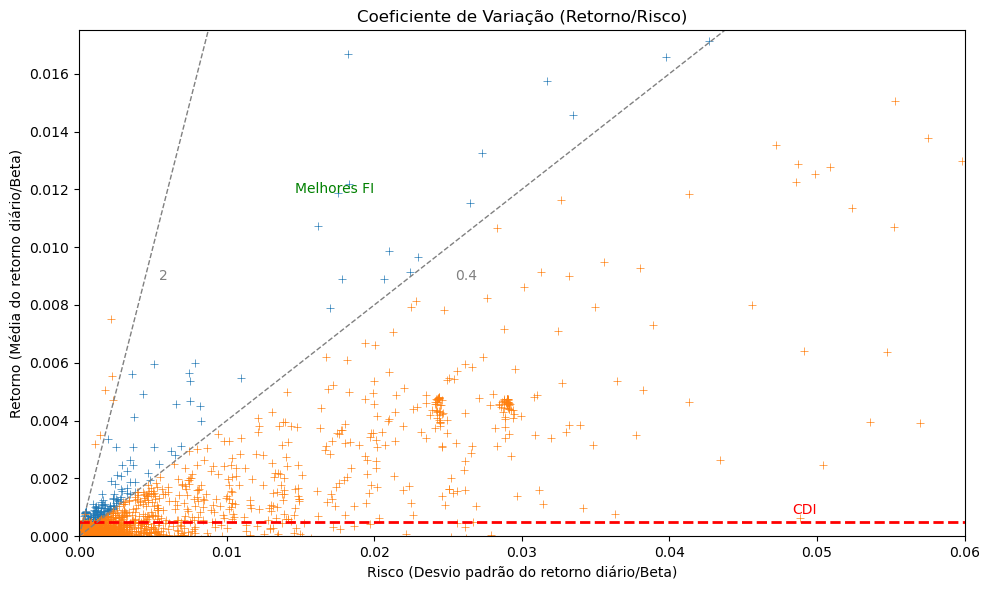

In [54]:
plt.figure(figsize=(10, 6))

ax = sns.scatterplot(data=best, x="beta_std", y="beta_mean", marker='+')
ax = sns.scatterplot(data=noBest, x="beta_std", y="beta_mean", marker='+')

ax.set_ylim(0, 0.0175)
ax.set_xlim(0, 0.06)

ax.axhline(y=cdi_daily, linestyle='--', linewidth=2, color='r')
ax.text(x=0.05, y=0.0009, s='CDI', color='r', va='center', ha='right')

ax.text(x=0.006, y=0.009, s='2', color='gray', va='center', ha='right')
ax.text(x=0.027, y=0.009, s='0.4', color='gray', va='center', ha='right')
ax.text(x=0.02, y=0.012, s='Melhores FI', color='g', va='center', ha='right')

plt.plot([0, 0.00875], [0, 0.0175], linestyle='--', linewidth=1, color='gray')
plt.plot([0, 0.04375], [0, 0.0175], linestyle='--', linewidth=1, color='gray')

plt.xlabel('Risco (Desvio padrão do retorno diário/Beta)')
plt.ylabel('Retorno (Média do retorno diário/Beta)')


plt.title('Coeficiente de Variação (Retorno/Risco)')
plt.tight_layout()

plt.show()

In [55]:
best.sample(3)

,beta_mean,beta_std,Coefficient_of_variation
WESTERN ASSET PREV FIX FUNDO DE INVESTIMENTO RENDA FIXA CREDITO PRIVADO,0.001657,0.003242,0.511097
BRADESCO FUNDO DE INVESTIMENTO RENDA FIXA PASSAÚNA,0.000552,0.000944,0.585238
UBS CONSENSO JURO REAL FUNDO DE INVESTIMENTO RENDA FIXA CRÉDITO PRIVADO,0.002494,0.005399,0.461893


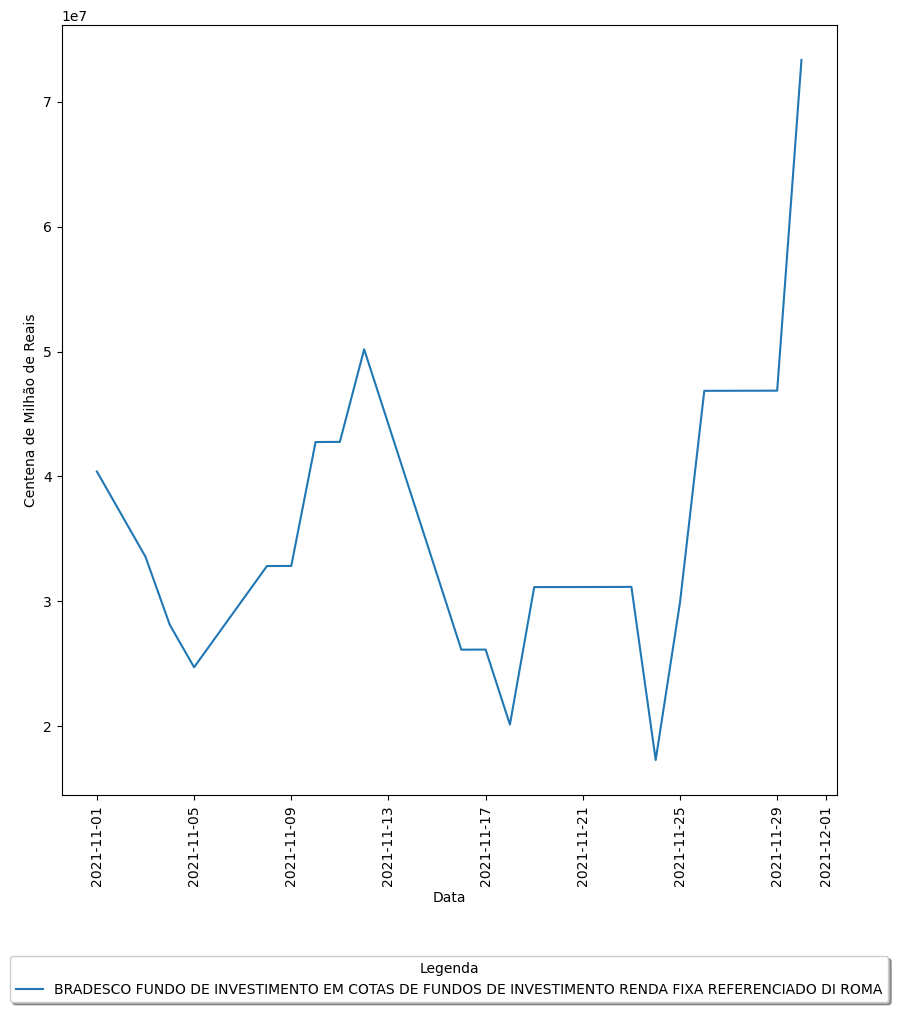

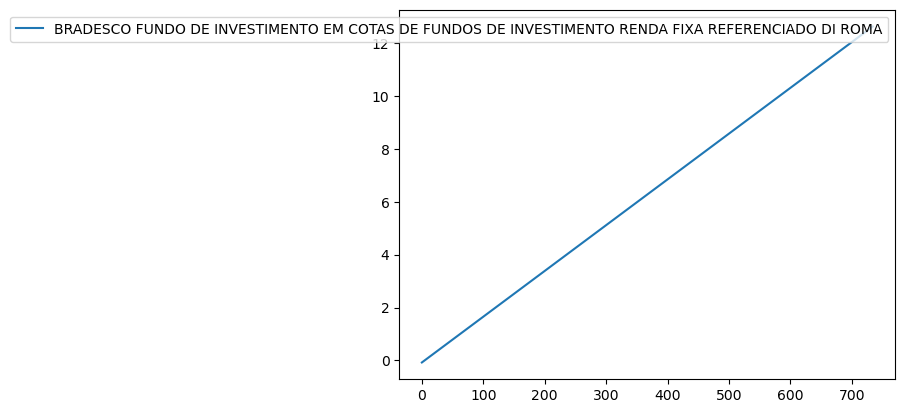

In [56]:
plt.figure(figsize=(10, 10))

for index, row in best.head(1).iterrows():
    datas_str = data.index.copy()
    datas_lista = datas_str.to_list()
    ultima_data = datas_lista[-1]

    novas_datas = [ultima_data + timedelta(days=i) for i in range(1, 246)]

    datas_lista.extend(novas_datas)
    novo_index = pd.Index(datas_lista)
    
    sns.lineplot(data=data, x=data.index, y=index, label = index)
#     sns.lineplot(x=novo_index, y=predictions[index].reshape(-1), label = index)
    

plt.xlabel('Data')
plt.ylabel('Centena de Milhão de Reais')
plt.xticks(rotation=90)

plt.legend(title='Legenda', loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)


# plt.legend()
plt.show()

x = np.array([i for i in range(735)])
y = predictions[index].reshape(-1)


sns.lineplot(x=x, y=y, label = index)
plt.show()

In [58]:
index = 'WESTERN ASSET PREV FIX FUNDO DE INVESTIMENTO RENDA FIXA CREDITO PRIVADO'

In [59]:
datas_str = data.index.copy()
datas_lista = datas_str.to_list()
ultima_data = datas_lista[-1]

novas_datas = [ultima_data + timedelta(days=i) for i in range(1, 246)]

datas_lista.extend(novas_datas)
novo_index = pd.Index(datas_lista)

sns.lineplot(x=novo_index, y=predictions[index].reshape(-1), label = index)

ValueError: All arrays must be of the same length

In [ ]:
predictions[index].reshape(-1)

In [ ]:
predictions[index]

In [68]:
cad['VL_PATRIM_LIQ'].

(74961,)

In [ ]:
# MSSQL Server
conn.close()